<h1> <b>Telecommunications Customer Churn: Logistic Regression Model </b> </h1>
<br> Building a Logistic Regression Model to help predict features of customer churn. </br>

In [1]:
#!pip install xgboost

In [2]:
#Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score, accuracy_score, roc_curve, auc, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization---------------------

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

<h2>Exploratory Data Analysis</h2>

<b>Create a dataframe and evaluate the necessary columns for analysis.</b>
<br>Creates df_clean dataframe.</br>

In [3]:
# Import data and review the size of the dataset
df_clean = pd.read_excel('path-here') #original dataframe that does not have any changes
print(df_clean.shape)
print("The data set contains: {} rows and {} columns".format(df_clean.shape[0], df_clean.shape[1]))

(10000, 50)
The data set contains: 10000 rows and 50 columns


In [4]:
df_clean.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
# Drop irrelevant columns to the research question
df_clean.drop(['Customer_id','UID','Email','CaseOrder','Interaction','City', 'State', 'County', 'Zip', 
             'Lat', 'Lng', 'Population', 'TimeZone', 'Job', 
             'Income', 'Marital','Contacts', 
             'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 
             'Item8'], axis=1, inplace=True)
df_clean.head()

,Area,Children,Age,Gender,Churn,Outage_sec_perweek,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,0,68,Male,No,7.978323,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,Urban,1,27,Female,Yes,11.699080,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,Urban,4,50,Female,No,10.752800,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,Suburban,1,48,Male,No,14.913540,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,Suburban,0,83,Male,Yes,8.147417,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436


In [6]:
#Explore dataset
df_clean.info() # Obtain features of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  10000 non-null  object 
 1   Children              10000 non-null  int64  
 2   Age                   10000 non-null  int64  
 3   Gender                10000 non-null  object 
 4   Churn                 10000 non-null  object 
 5   Outage_sec_perweek    10000 non-null  float64
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Techie                10000 non-null  object 
 8   Contract              10000 non-null  object 
 9   Port_modem            10000 non-null  object 
 10  Tablet                10000 non-null  object 
 11  InternetService       10000 non-null  object 
 12  Phone                 10000 non-null  object 
 13  Multiple              10000 non-null  object 
 14  OnlineSecurity        10000 non-null  object 
 15  OnlineBackup        

<h3>Data Dictionary</h3>
<br></br>
<li>Area - ['Urban' 'Suburban' Rural']</li>
<li>Children - If customer has dependents - ['No' 'Yes']</li>
<li>Gender - Customer gender - ['Female' 'Male']</li>
<li>Age - Age of customer - ['Senior' 'Not Senior']</li>
<li>Outage_sec_perweek - Outages per week in customer's neighborhood by seconds - ['LowOutage' 'HighOutage']</li>
<li>Yearly_equip_failure - Number of times equipment has failed and been replaced - ['Never Failed' 'Failed Equipment']</li>
<li>Techie - Customer's technical ability - ['No' 'Yes']</li>
<li>Bandwidth_GB_Year - Amount of bandwidth used per year (in GB)</li>
<li>Port_modem - Customer using port modems - ['No' 'Yes']</li>
<li>Tablet - Customer connected to tablet - ['No' 'Yes']</li>
<li>Tenure - Customer lifespan (in months)</li>
<li>PhoneService - - ['No' 'Yes']</li>
<li>Multiple - Muliple phone line services - ['No' 'Yes']</li>
<li>InternetService - - ['No' 'No internet service' 'Yes']</li>
<li>OnlineSecurity - - ['No' 'No internet service' 'Yes']</li>
<li>OnlineBackup - - ['No' 'No internet service' 'Yes']</li>
<li>DeviceProtection - - ['No' 'No internet service' 'Yes']</li>
<li>TechSupport - - ['No' 'No internet service' 'Yes']</li>
<li>StreamingTV - - ['No' 'No internet service' 'Yes']</li>
<li>StreamingMovies - - ['No' 'No internet service' 'Yes']</li>
<li>Contract - Type of contract - ['Month-to-month' 'One year' 'Two year']</li>
<li>PaperlessBilling - - ['No' 'Yes']</li>
<li>PaymentMethod - payment method - ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check (check)', 'Mailed check (check)']</li>
<li>MonthlyCharges - Monthly Recurring Charges</li>
<b><li>Churn - Churn value, the target variable - ['No' 'Yes']</li></b>

In [7]:
# print missing values
print("Missing values (per feature): \n{}\n".format(df_clean.isnull().sum()))

Missing values (per feature): 
Area                    0
Children                0
Age                     0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64



In [8]:
df_clean.nunique() # Determine unique data values of the columns

Area                        3
Children                   11
Age                        72
Gender                      3
Churn                       2
Outage_sec_perweek       9986
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             3
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBackup                2
DeviceProtection            2
TechSupport                 2
StreamingTV                 2
StreamingMovies             2
PaperlessBilling            2
PaymentMethod               4
Tenure                   9996
MonthlyCharge             750
Bandwidth_GB_Year       10000
dtype: int64

In [9]:
print("Number of categorical features : {}".format(len(df_clean.select_dtypes(include=['object']).columns)))
print("Number of numerical features : {}".format(len(df_clean.select_dtypes(include=['int64', 'float64']).columns)))

Number of categorical features : 18
Number of numerical features : 7


<h2><b>Data Analysis</b></h2>
<br>Explore the churn data of each category feature.</br>

<b>Descriptive statistics summary and visualization for numerical categories.</b>
<br>Explore the numeric categories for analysis.</br>
<br>Convert the numerical columns to categorical features.</br>

In [10]:
#Summary statistics of the numerical categories
df_clean.describe()

,Children,Age,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,10.001848,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,2.976019,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,0.099747,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,8.018214,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,10.018560,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,11.969485,1.000000,61.479795,200.734725,5586.141369
max,10.0000,89.000000,21.207230,6.000000,71.999280,290.160419,7158.981530


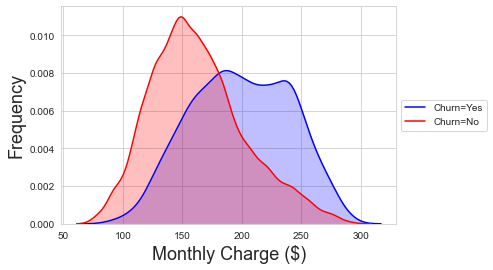

In [11]:
sns.set_style('whitegrid')
g2 = sns.kdeplot(df_clean[df_clean['Churn'] == 'Yes']['MonthlyCharge'], shade=True, color="b", label='Churn=Yes')
g2 = sns.kdeplot(df_clean[df_clean['Churn'] == 'No']['MonthlyCharge'], shade=True, color="r", label='Churn=No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Monthly Charge ($)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [12]:
# Code to define values and coerce the numerical MonthlyCharges into a categorical feature.
def charges(data):
    if 0 < data  <= 150 :
        return 'LowCharge'
    else:
        return 'HighCharge'

df_clean['MonthlyCharge'] = df_clean['MonthlyCharge'].apply(charges)

Most customers were retained at $150 monthly charges.

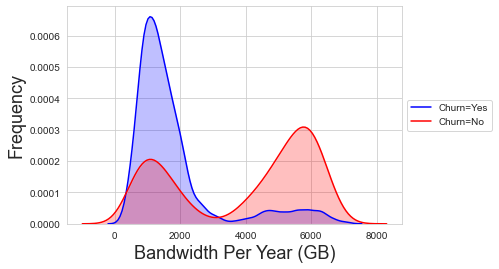

In [13]:
sns.set_style('whitegrid')
g2 = sns.kdeplot(df_clean[df_clean['Churn'] == 'Yes']['Bandwidth_GB_Year'], shade=True, color="b", label='Churn=Yes')
g2 = sns.kdeplot(df_clean[df_clean['Churn'] == 'No']['Bandwidth_GB_Year'], shade=True, color="r", label='Churn=No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Bandwidth Per Year (GB)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [14]:
# Code to define values and coerce the numerical Bandwidth_GB_Year into a categorical feature.
def usage(data):
    if 0 < data  <= 1000 :
        return 'LowUsage'
    else:
        return 'HighUsage'

df_clean['Bandwidth_GB_Year'] = df_clean['Bandwidth_GB_Year'].apply(usage)

Most customer churn happened around the 1000 GB bandwidth usage per year.

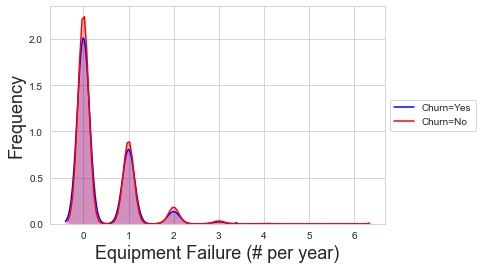

In [15]:
sns.set_style('whitegrid')
g2 = sns.kdeplot(df_clean[df_clean['Churn'] == 'Yes']['Yearly_equip_failure'], shade=True, color="b", label='Churn=Yes')
g2 = sns.kdeplot(df_clean[df_clean['Churn'] == 'No']['Yearly_equip_failure'], shade=True, color="r", label='Churn=No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Equipment Failure (# per year)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [16]:
# Code to define values and coerce the numerical Yearly_equip_failure into a categorical feature.
def equip(data):
    if  data  <= 0 :
        return 'Never Failed'
    else:
        return 'Failed Equipment'

df_clean['Yearly_equip_failure'] = df_clean['Yearly_equip_failure'].apply(equip)

Variable looks equivalent so the analysis will compare no failure vs any failures per year.

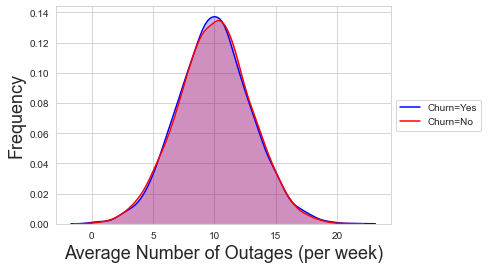

In [17]:
sns.set_style('whitegrid')
g2 = sns.kdeplot(df_clean[df_clean['Churn'] == 'Yes']['Outage_sec_perweek'], shade=True, color="b", label='Churn=Yes')
g2 = sns.kdeplot(df_clean[df_clean['Churn'] == 'No']['Outage_sec_perweek'], shade=True, color="r", label='Churn=No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Average Number of Outages (per week)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [18]:
# Code to define values and coerce the numerical Outage_sec_perweek into a categorical feature.
def out(data):
    if 0 < data  <= 10 :
        return 'LowOutage'
    else:
        return 'HighOutage'

df_clean['Outage_sec_perweek'] = df_clean['Outage_sec_perweek'].apply(out)

Variable looks equivalent and will compare the average described earlier.

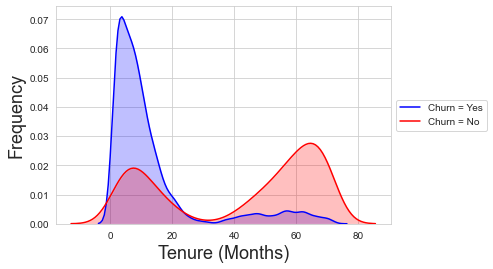

In [19]:
sns.set_style('whitegrid')
g1 = sns.kdeplot(df_clean[df_clean['Churn'] == 'Yes']['Tenure'], shade=True, color="b", label='Churn = Yes')
g1 = sns.kdeplot(df_clean[df_clean['Churn'] == 'No']['Tenure'], shade=True, color="r", label='Churn = No')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Tenure (Months)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

In [20]:
# Code to define values and coerce the numerical Tenure into a categorical feature.
def lifespan(data):
    if 0 < data  <= 18 :
        return 'Short'
    else:
        return 'Long'

df_clean['Tenure'] = df_clean['Tenure'].apply(lifespan)

Most customer churn happened around the 18 months mark (1.5 years).

<b>Recode columns and features for clean binary analysis.</b>

In [21]:
#Recode Age Column
def age(data):
    if 0 < data  <= 64 :
        return 'Not Senior'
    else:
        return 'Senior'

df_clean['Age'] = df_clean['Age'].apply(age)

In [22]:
#Recode Children Column
def child(data):
    if  data >= 1 :
        return 'Dependents'
    else:
        return 'No Dependents'

df_clean['Children'] = df_clean['Children'].apply(child)

In [23]:
recode = {'No phone service' : 'No',
          'No internet service' : 'No',
            'Fiber optic' : 'Fiberoptic',
            'Month-to-month' : 'MtM',
            'Two year' : 'TwoYr',
            'One year' : 'OneYr' ,
            'Electronic Check' : 'Check',
            'Mailed Check' : 'Check',
            'Bank Transfer(automatic)' : 'Automatic',
            'Credit Card (automatic)' : 'Automatic'
            }
df_clean.replace(recode, inplace=True)
df_clean.isnull().sum().sort_values(ascending=False)

Bandwidth_GB_Year       0
InternetService         0
Children                0
Age                     0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
Phone                   0
MonthlyCharge           0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure                  0
Area                    0
dtype: int64

In [24]:
df_clean.head()
df_clean.to_csv('final_churn.csv') #export clean dataset to csv

<h3><b>Exploring Variables and Churn Rate</b></h3>
<br><b>Overall Customer Churn Rate </b></br>

Proportion of customers that did churn: 26.5%
Proportion of customers that did not churn: 73.5%


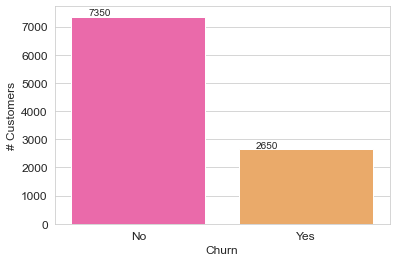

In [25]:
fig, ax = plt.subplots()
sns.countplot(df_clean['Churn'], palette='spring')

plt.xticks(size=12)
plt.xlabel('Churn', size=12)
plt.yticks(size=12)
plt.ylabel('# Customers', size=12)

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

mt1 = df_clean.Churn.value_counts(normalize='columns')*100
print("Proportion of customers that did churn: {:.1f}%".format(mt1.iloc[1]))
print("Proportion of customers that did not churn: {:.1f}%".format(mt1.iloc[0]))

<b>Explore the various qualities of customers that churned.</b>

In [26]:
# helper funtion - display count plot
def displayCountPlot(cat_list, df, rows=1, columns=3, figsize=(14,2.5), export=False):
    
  fig, ax = plt.subplots(ncols=columns, figsize=figsize)
  
  idx = 0
  for c in cat_list:
    idx += 1
    plt.subplot(rows, columns, idx)
    ax = sns.countplot(x=df[c], data=df, palette='spring')

    plt.xticks(size=10)
    plt.xlabel('')
    plt.yticks(size=12)
    plt.ylabel('')
    plt.subplots_adjust(hspace = 0.4)
    ax.tick_params(labelleft=False)
    ax.set_title(c, alpha=0.8)

    print_rate(ax, df.shape[0])

def print_rate(ax, total):
  for p in ax.patches:
    text = '{:.1f}% ({})'.format(100 * p.get_height() / total, p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() * 0.5
    ax.annotate(text, (x, y), size = 10, ha="center", va="center")


In [27]:
df_churn = df_clean[df_clean['Churn'] == 'Yes']
df_churn = df_churn.drop('Churn', axis=1)

lifespan = ['Tenure']
personal = ['Gender','Age','Children', 'Techie', 'Area' ]
devices  = ['Tablet','Phone', 'Multiple', 'Port_modem','InternetService']
services = ['OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies',
           'Outage_sec_perweek', 'Bandwidth_GB_Year', 'Yearly_equip_failure']
contract = ['Contract', 'PaperlessBilling', 'PaymentMethod','MonthlyCharge']

<h3><b>Understanding the Customer Lifespan</b></h3>
<br></br>
<b>How has the customer lifespan impact the level of customer churn?</b>
<br>Customers are 5 times more likely to churn before they hit the 1.5 year mark with the company.</br>

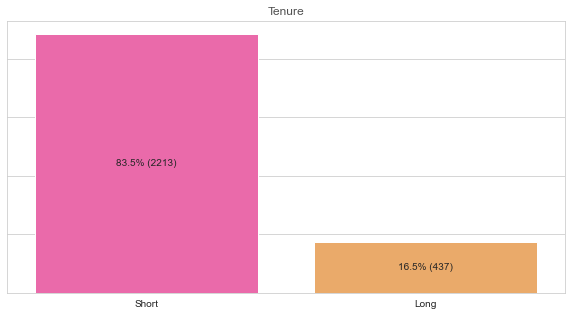

In [28]:
displayCountPlot(lifespan, df_churn, rows=1, columns=1, figsize=(10,5), export=True)

<h3><b>Understanding Customer Profiles</b></h3>
<br></br>
Customer profiles are grouped into four categories: personal attributes, types of devices involved in their profile, types of services, and contract aspects.

<b>Category by Personal Attributes</b>

<br>Here are some observations:</br>
<br>Gender does not seem to have an impact on churn rate.</br>
<br>Those that do not identify as Senior Citizens are 2 times likely to churn than Senior Citizens.</br>
<br>Those that have dependents are 3 times likely to churn compared to those without dependents.</br>
<br>Those that are not tech savvy have shown to be almost 4 times like to churn than those who are tech savvy.</br>
<br>The area of residence does not seem to have a visible impact on churn.</br>

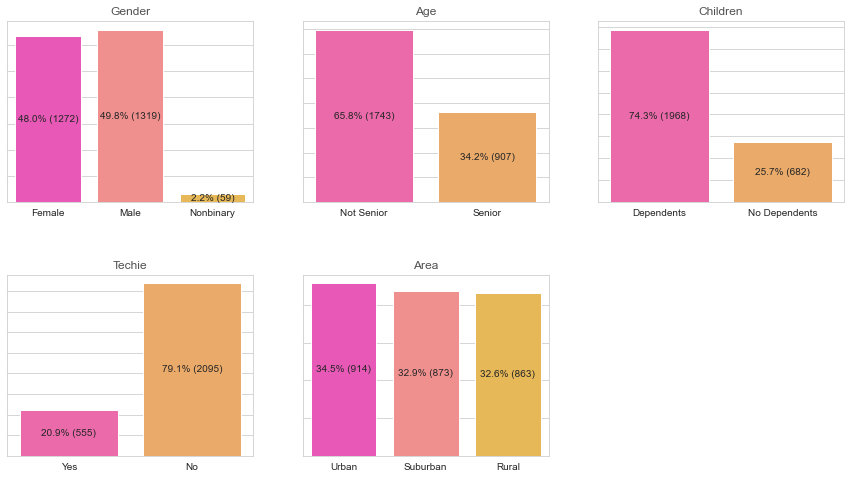

In [29]:
displayCountPlot(personal, df_churn, rows=2, columns=3, figsize=(15,8), export=True)

<b>Category by Types of Devices</b>

<br>Here are some observations:</br>
<br>Having a Tablet does not significantly influence churn rate.</br>
<br>Customers with phone services are 8 times likely to churn, the highest seen so far.</br>
<br>Customers with multiple phone lines are slightly likely to churn than those that only have a single line.</br>
<br>Having a port modem does not indicate influence on churn rate.</br>
<br>Customer with internet services, whether it is Fiber Optic or DSL, indicates they are 2 times likely to churn than customers without internet services.</br>

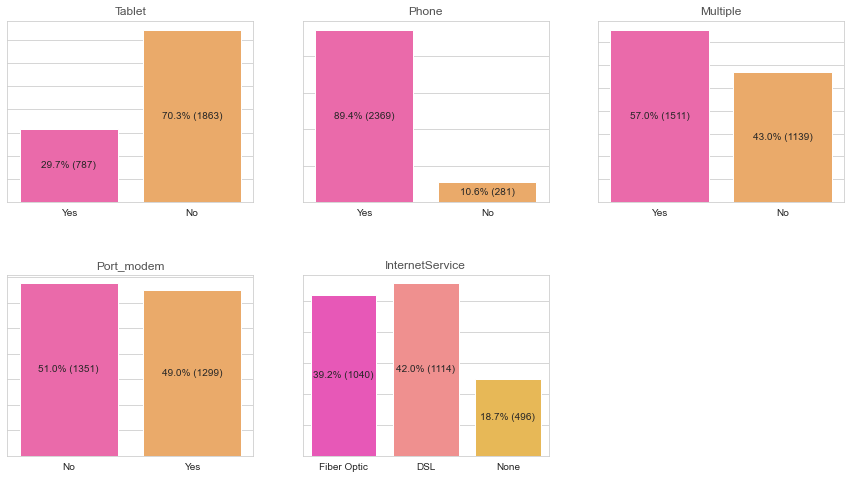

In [30]:
displayCountPlot(devices, df_churn, rows=2, columns=3, figsize=(15,8), export=True)

<b>Category by Types of Services</b>

<br>Here are some observations:</br>
<br>Weekly Outages, Device Protection and Online Backup does not indicate high correlation to customer churn.</br>
<br>Customers without online security are 2 times likely to churn.</br>
<br>Equipment failure and replacement does not have a directly positive correlation to churn.</br>
<br>The lack of tech support have shown that customers are 1.5 times likely to churn.</br>
<br>Customers with products such as streaming TV and Movies indicated they are 2-3 times likely to churn.</br>
<br>Customer with high bandwidth usage per year (1000+ GB) are almost 3 times likely to churn.</br>

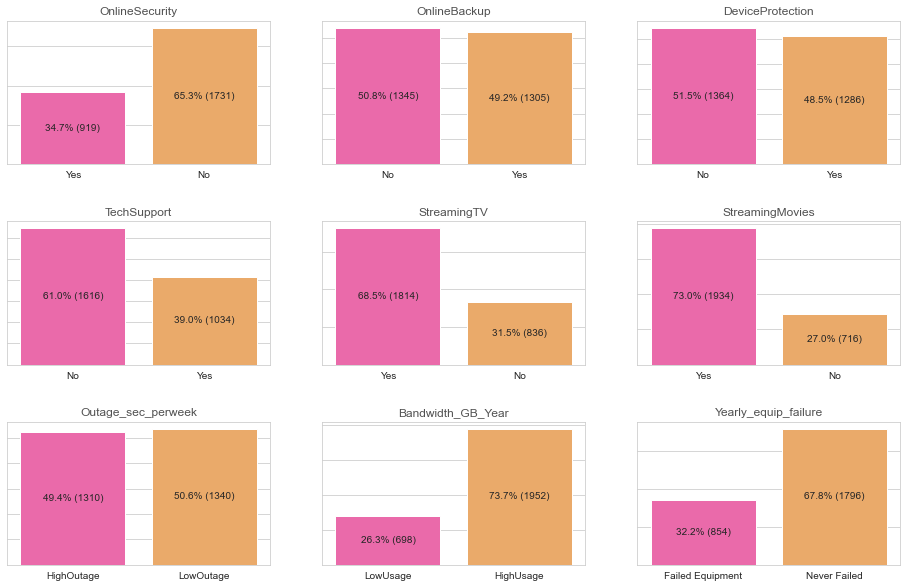

In [31]:
displayCountPlot(services, df_churn, rows=3, columns=3, figsize=(16,10), export=True)

<b>Category by Types of Contracts</b>

<br>Here are some observations:</br>
<br>Customers with Month-to-Month contracts are 7 times likely to churn compared to customers with one-year or two-year contracts.</br>
<br>Customers with paperless billing are slightly likely to churn than customers with paper billing.</br>
<br>Customers who pay by checks are slightly likely to churn than those with automatic or electronic payments.</br>
<br>Customers who have high monthly charges (150+) are 6 times likely to churn than customers that pay $150 or less monthly.</br>

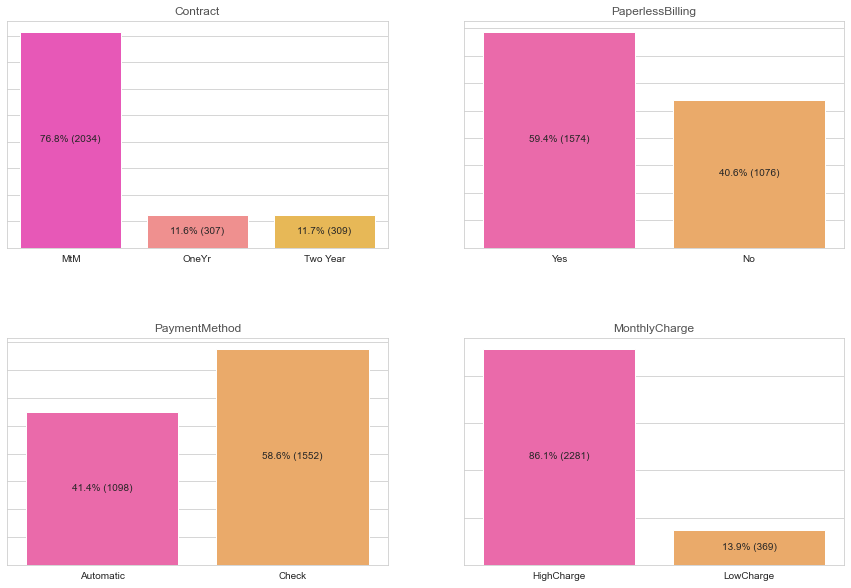

In [32]:
displayCountPlot(contract, df_churn, rows=2, columns=2, figsize=(15,10), export=True)

<h2><b>Logistic Regression Model</b></h2>
<br></br>
<b>Split features into binary, numeric or categorical to retrieve dummy variables.</b>

In [33]:
# Replace churn string values with numeric binary values
df_clean.Churn.replace({"Yes":1, "No":0}, inplace = True)

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Area                  10000 non-null  object
 1   Children              10000 non-null  object
 2   Age                   10000 non-null  object
 3   Gender                10000 non-null  object
 4   Churn                 10000 non-null  int64 
 5   Outage_sec_perweek    10000 non-null  object
 6   Yearly_equip_failure  10000 non-null  object
 7   Techie                10000 non-null  object
 8   Contract              10000 non-null  object
 9   Port_modem            10000 non-null  object
 10  Tablet                10000 non-null  object
 11  InternetService       10000 non-null  object
 12  Phone                 10000 non-null  object
 13  Multiple              10000 non-null  object
 14  OnlineSecurity        10000 non-null  object
 15  OnlineBackup          10000 non-null 

In [35]:
binary_feat = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean.select_dtypes('object').columns.to_list() if col not in binary_feat + 
                    numeric_feat ]

df_proc = df_clean.copy()

In [36]:
# Utilize pandas dummy variable function to create dummy variable series for categorical data
df_proc = pd.get_dummies(df_proc)
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Churn                                  10000 non-null  int64
 1   Area_Rural                             10000 non-null  uint8
 2   Area_Suburban                          10000 non-null  uint8
 3   Area_Urban                             10000 non-null  uint8
 4   Children_Dependents                    10000 non-null  uint8
 5   Children_No Dependents                 10000 non-null  uint8
 6   Age_Not Senior                         10000 non-null  uint8
 7   Age_Senior                             10000 non-null  uint8
 8   Gender_Female                          10000 non-null  uint8
 9   Gender_Male                            10000 non-null  uint8
 10  Gender_Nonbinary                       10000 non-null  uint8
 11  Outage_sec_perweek_HighOutage

In [37]:
# Compare original vs processed dataset.
print('Original dataset: ', df_clean.shape) 
print('Processed dataset: ', df_proc.shape)

df_proc.head()

Original dataset:  (10000, 25)
Processed dataset:  (10000, 53)


,Churn,Area_Rural,Area_Suburban,Area_Urban,Children_Dependents,Children_No Dependents,Age_Not Senior,Age_Senior,Gender_Female,Gender_Male,Gender_Nonbinary,Outage_sec_perweek_HighOutage,Outage_sec_perweek_LowOutage,Yearly_equip_failure_Failed Equipment,Yearly_equip_failure_Never Failed,Techie_No,Techie_Yes,Contract_MtM,Contract_OneYr,Contract_Two Year,Port_modem_No,Port_modem_Yes,Tablet_No,Tablet_Yes,InternetService_DSL,InternetService_Fiber Optic,InternetService_None,Phone_No,Phone_Yes,Multiple_No,Multiple_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Automatic,PaymentMethod_Check,Tenure_Long,Tenure_Short,MonthlyCharge_HighCharge,MonthlyCharge_LowCharge,Bandwidth_GB_Year_HighUsage,Bandwidth_GB_Year_LowUsage
0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,1
1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1
2,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0
3,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0
4,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1


<h3>Test for Multicollinearity: Visualizing Correlations</h3>
<br>A requirement for building a logistic regression model is to test for multicollinearity and make sure the input variables are independent of each other.</br>

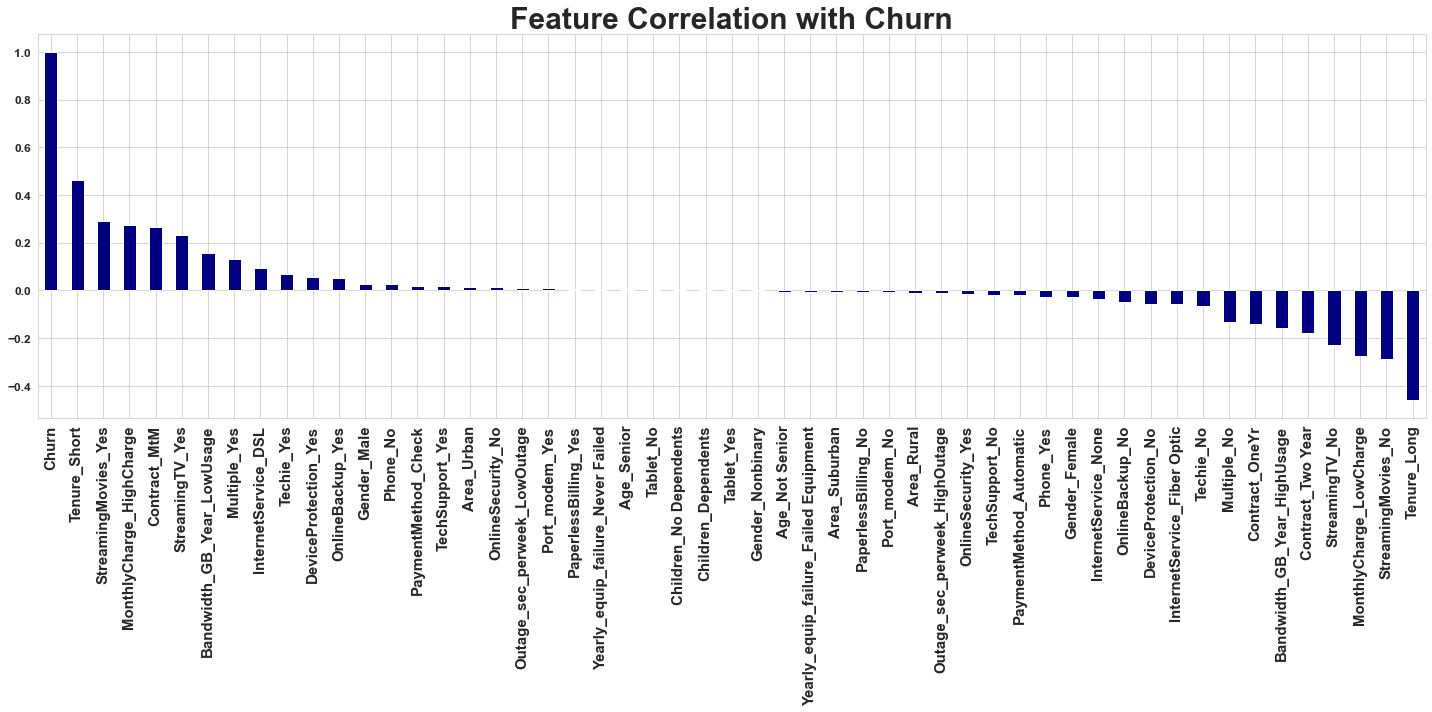

In [38]:
# Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
df_proc.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', figsize = (20, 10), color = 'Navy')
plt.title('Feature Correlation with Churn', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.tight_layout()

From reviewing each category in the previous exercise, this visual confirms out observations of which feature shows positive correlation to customer churn and features that show negative correlation to customer churn.

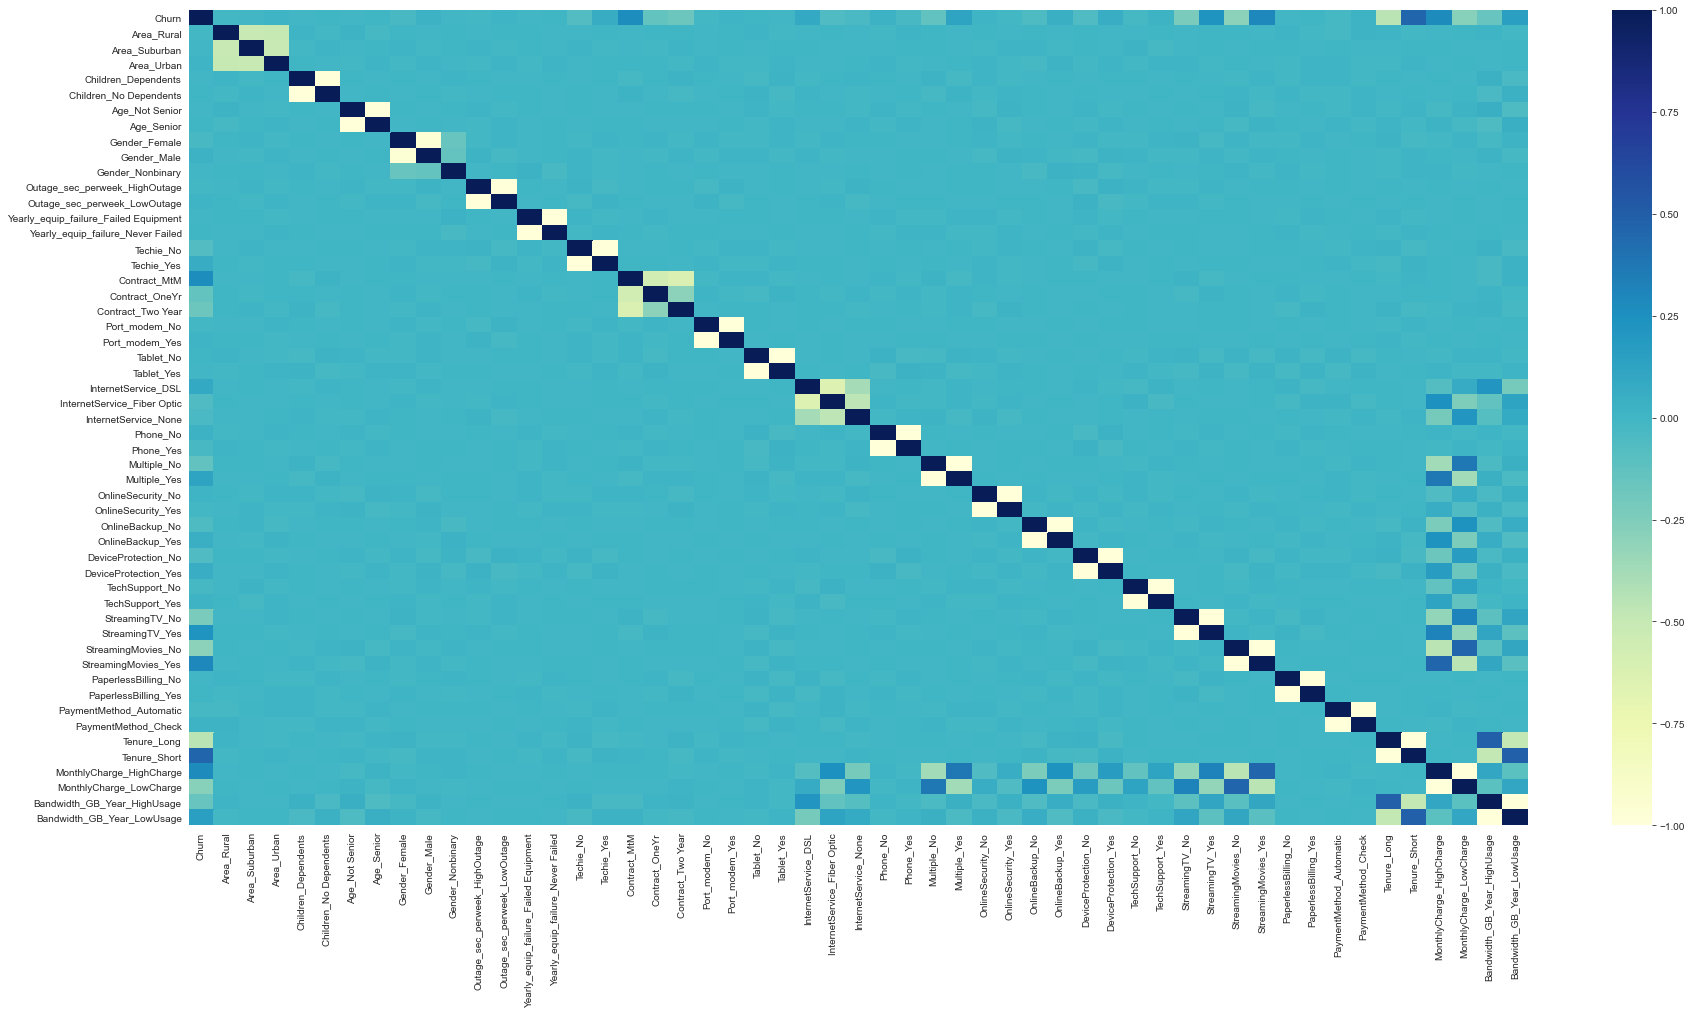

In [39]:
# Visualize a heatmap for our features correlation values
plt.figure(figsize = (30, 15))
x = sns.heatmap(df_proc.corr(), cmap = 'YlGnBu')

Upon reviewing this heatmap, we can easily visualize that these variables are independent of each other based on the color and scale measurement. Now that independence of the variables have been established, a logistic regression can be modeled in the next steps.

<h3><b>Pre-Processing Data for Logistic Regression</b><h/3>

In [40]:
# Establish our target feature, churn, as our y feature
y = df_proc.Churn.values
# Drop our target feature from our features dataframe
X = df_proc.drop('Churn', axis = 1)
# Save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [41]:
from sklearn.preprocessing import MinMaxScaler
# Instantiate min-max scaling object
mm = MinMaxScaler()
# Fit and transform our feature dataframe
X = pd.DataFrame(mm.fit_transform(X))
# Reassign column names so new dataframe has corresponding names
X.columns = cols

<h3><b>Train Test Split</b></h3>

In [42]:
# Perform train test split from our target feature series and the predicting feature dataframe (set test size to 30% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h3><b>Building the Model</b></h3>

In [43]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [44]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

<h3><b>Model Evaluation</b></h3>

<b>How many times was the classifier correct on the training set?</b>

In [45]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    6229
1     771
dtype: int64
----------------------------------
0    0.889857
1    0.110143
dtype: float64


<b>Training Set Results:</b>
<br>There is an 89% accuracy on the training set.</br>
<br>6219 correctly classified; 781 incorrectly classified</br>

<b>How many times was the classifier correct on the test set?</b>

In [46]:
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    2653
1     347
dtype: int64
---------------------------------
0    0.884333
1    0.115667
dtype: float64


<b>Testing Set Results:</b>
<br>There is an 88% accuracy on the testing set.</br>
<br>2657 correctly classified; 343 incorrectly classified</br>

<h3><b>Confusion Matrix</b></h3>

[[2041  163]
 [ 184  612]]


<Figure size 2016x1440 with 0 Axes>

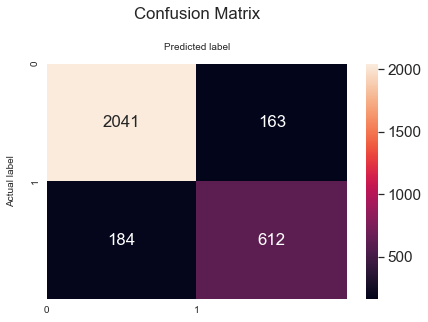

In [47]:
cm = confusion_matrix(y_test, y_hat_test) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion Matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print(confusion_matrix(y_test, y_hat_test))

<li>True negatives in the upper-left position: 2029</li>
<li>False negatives in the lower-left position: 203</li>
<li>False positives in the upper-right position: 140</li>
<li>True positives in the lower-right position: 628</li>

In [48]:
print('Classification Report:')
print(classification_report(y_test, y_hat_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      2204
           1       0.79      0.77      0.78       796

    accuracy                           0.88      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.88      0.88      0.88      3000



<li>Accuracy Score: 89%</li>
<li>Precison Score: 82%</li>
<li>Recall Score: 76%</li>
<li>F1 Score: 79%</li>

<h3><b>Plot ROC Curves</b></h3>

In [49]:
y_score = logreg.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score))

roc_auc_score for Logistic Regression:  0.9429027510510812


Based on the 0.94 ROC score, this model contains an excellent classifier.

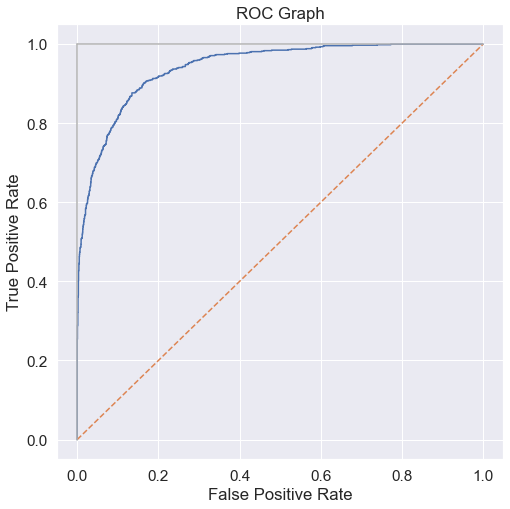

In [50]:
plt.subplots(1, figsize=(8,8))
plt.title('ROC Graph')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h2><b>Logistic Regression Model 2: Reduced Category Logistic Model</b></h2> 
<br>In the second model, the same dataset is used. However, the number of input variables will be reduced for this analysis. Instead of focusing on different characteristics of the customer and their profile, we will analyze solely on the company's product and services. This will reduce the previous 25 variables by half, to only 12 variables.</br>
<br></br>
<br><b>Clean up dataset</b></br>

In [51]:
df_clean2 = pd.read_excel('path-here') #original dataframe2 that does not have any changes

In [52]:
df_clean2.drop(['Customer_id','UID','Email','CaseOrder','Interaction','City', 'State', 'County', 'Zip', 
             'Lat', 'Lng', 'Population', 'TimeZone', 'Job', 
             'Income', 'Marital','Contacts', 
             'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 
             'Item8','Gender','Age','Children', 'Techie', 'Area',
             'Contract', 'PaperlessBilling', 'PaymentMethod',
             'MonthlyCharge','Tenure'], axis=1, inplace=True)

In [53]:
print("Number of categorical features : {}".format(len(df_clean2.select_dtypes(include=['object']).columns)))
print("Number of numerical features : {}".format(len(df_clean2.select_dtypes(include=['int64', 'float64']).columns)))

Number of categorical features : 12
Number of numerical features : 3


<b>Recode features</b>
<br>Recoding the same features as the first model.</br>

In [54]:
# Code to define values and coerce the numerical Bandwidth_GB_Year into a categorical feature.
def usage(data):
    if 0 < data  <= 1000 :
        return 'LowUsage'
    else:
        return 'HighUsage'

df_clean2['Bandwidth_GB_Year'] = df_clean2['Bandwidth_GB_Year'].apply(usage)

In [55]:
# Code to define values and coerce the numerical Yearly_equip_failure into a categorical feature.
def equip(data):
    if  data  <= 0 :
        return 'Never Failed'
    else:
        return 'Failed Equipment'

df_clean2['Yearly_equip_failure'] = df_clean2['Yearly_equip_failure'].apply(equip)

In [56]:
# Code to define values and coerce the numerical Outage_sec_perweek into a categorical feature.
def out(data):
    if 0 < data  <= 10 :
        return 'LowOutage'
    else:
        return 'HighOutage'

df_clean2['Outage_sec_perweek'] = df_clean2['Outage_sec_perweek'].apply(out)

In [57]:
df_clean2.head()

,Churn,Outage_sec_perweek,Yearly_equip_failure,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Bandwidth_GB_Year
0,No,LowOutage,Failed Equipment,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,LowUsage
1,Yes,HighOutage,Failed Equipment,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,LowUsage
2,No,HighOutage,Failed Equipment,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,HighUsage
3,No,HighOutage,Never Failed,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,HighUsage
4,Yes,LowOutage,Failed Equipment,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,LowUsage


<b> Pre-processing data for Model 2</b>

In [58]:
# Replace churn string values with numeric binary values
df_clean2.Churn.replace({"Yes":1, "No":0}, inplace = True)

In [59]:
binary_feat = df_clean2.nunique()[df_clean2.nunique() == 2].keys().tolist()
numeric_feat = [col for col in df_clean2.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in df_clean2.select_dtypes('object').columns.to_list() if col not in binary_feat + 
                    numeric_feat ]

df_feat = df_clean2.copy()

In [60]:
#Get dummy variables
df_dummy = pd.get_dummies(df_feat)
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Churn                                  10000 non-null  int64
 1   Outage_sec_perweek_HighOutage          10000 non-null  uint8
 2   Outage_sec_perweek_LowOutage           10000 non-null  uint8
 3   Yearly_equip_failure_Failed Equipment  10000 non-null  uint8
 4   Yearly_equip_failure_Never Failed      10000 non-null  uint8
 5   Port_modem_No                          10000 non-null  uint8
 6   Port_modem_Yes                         10000 non-null  uint8
 7   Tablet_No                              10000 non-null  uint8
 8   Tablet_Yes                             10000 non-null  uint8
 9   InternetService_DSL                    10000 non-null  uint8
 10  InternetService_Fiber Optic            10000 non-null  uint8
 11  InternetService_None         

<b>Building Model 2</b>

In [61]:
# Establish our target feature, churn, as our y feature
y2 = df_dummy.Churn.values
# Drop our target feature from our features dataframe
X2 = df_dummy.drop('Churn', axis = 1)
# Save dataframe column titles to list for reassigning after min max scale 
cols = X2.columns

In [62]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

In [63]:
lr_model = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
lr_model.fit(X_train2, y_train2)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [64]:
# Generate model prediction data for train and test sets
y_hat_train2 = lr_model.predict(X_train2)
y_hat_test2 = lr_model.predict(X_test2)

<b>Evaluating Model 2</b>

<b>How many times was the classifier correct on the training set?

In [65]:
# Find residual differences between train data and predicted train data
residuals2 = np.abs(y_train2 - y_hat_train2)
# Print value counts of our predicted values 
print(pd.Series(residuals2).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals2).value_counts(normalize = True))

0    5502
1    1498
dtype: int64
----------------------------------
0    0.786
1    0.214
dtype: float64


<b>Training Set Results:</b>
<br>There is an 78% accuracy on the training set.</br>
<br>5479 correctly classified; 1521 incorrectly classified</br>

<b>How many times was the classifier correct on the testing set?

In [66]:
# Repeat previous step with test data
residuals2 = np.abs(y_test2 - y_hat_test2)
print(pd.Series(residuals2).value_counts())
print('---------------------------------')
print(pd.Series(residuals2).value_counts(normalize = True))

0    2365
1     635
dtype: int64
---------------------------------
0    0.788333
1    0.211667
dtype: float64


<b>Testing Set Results:</b>
<br>There is an 80% accuracy on the training set.</br>
<br>2397 correctly classified; 603 incorrectly classified</br>

<b>Confusion Matrix

[[1976  195]
 [ 440  389]]


<Figure size 2016x1440 with 0 Axes>

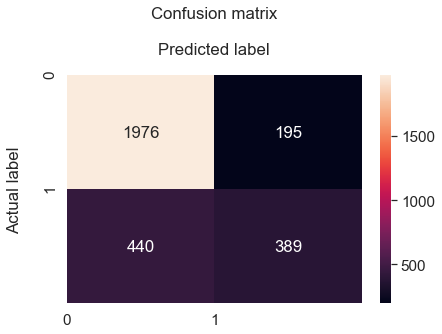

In [67]:
cm2 = confusion_matrix(y_test2, y_hat_test2) 
df_cm2 = pd.DataFrame(cm2, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm2, annot=True, fmt='g')
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print(confusion_matrix(y_test2, y_hat_test2))

<li>True negatives in the upper-left position: 2030</li>
<li>False negatives in the lower-left position: 430</li>
<li>False positives in the upper-right position: 173</li>
<li>True positives in the lower-right position: 367</li>

In [68]:
print('Classification Report:')
print(classification_report(y_test2, y_hat_test2))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2171
           1       0.67      0.47      0.55       829

    accuracy                           0.79      3000
   macro avg       0.74      0.69      0.71      3000
weighted avg       0.78      0.79      0.78      3000



<li>Accuracy Score: 80%</li>
<li>Precison Score: 68%</li>
<li>Recall Score: 46%</li>
<li>F1 Score: 55%</li>

<b>Plot ROC Curve

In [69]:
y_score2 = lr_model.predict_proba(X_test2)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test2, y_score2)
print('roc_auc_score for Logistic Regression2: ', roc_auc_score(y_test2, y_score2))

roc_auc_score for Logistic Regression2:  0.8186384954874515


Based on the 0.82 ROC score, this model contains an excellent classifier.

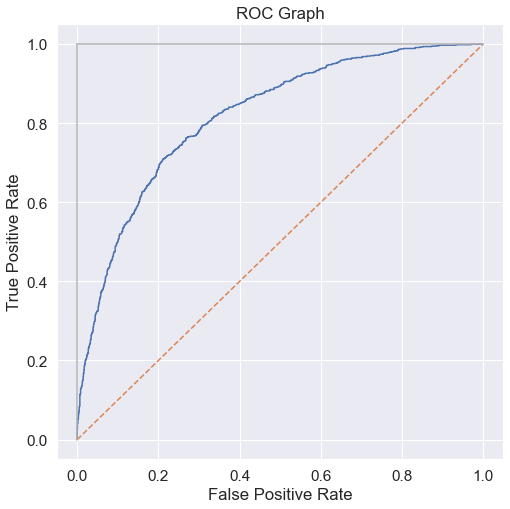

In [70]:
plt.subplots(1, figsize=(8,8))
plt.title('ROC Graph')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Comparing the first model and the second model, the first model contains a higher accuracy score and overall a better predictive model than the second. Despite both models with an excellent ROC score, the first model would be favored because the model contains a diverse amount of variables that include customer demographics, behaviors and their profile data. Meanwhile, the second model is solely focused on the types of services and products in a customer's profile. A good predictive model tailors to multiple consumer behaviors and characteristics, which is the goal of my research with this dataset.

In [71]:
logreg.intercept_

0.0

In [72]:
logreg.coef_

array([[-0.09243543, -0.10901018, -0.010899  , -0.04901466, -0.16332995,
        -0.03739968, -0.17494493, -0.10204765,  0.23500478, -0.34530174,
        -0.15313984, -0.05920477, -0.0718391 , -0.14050551, -0.51716709,
         0.30482247,  1.92574307, -0.99868156, -1.13940613, -0.12808307,
        -0.08426155, -0.07874776, -0.13359686,  0.84723269, -0.60667374,
        -0.45290357,  0.05532998, -0.2676746 , -0.7892039 ,  0.57685928,
        -0.06087279, -0.15147182, -0.44590713,  0.23356251, -0.33062183,
         0.11827722, -0.20541521, -0.00692941, -1.42122668,  1.20888206,
        -1.64828737,  1.43594276, -0.16341512, -0.0489295 , -0.25180706,
         0.03946245, -2.20577007,  1.99342546,  0.0099557 , -0.22230032,
        -0.53589481,  0.32355019]])

In [73]:
feature_importances = pd.concat([pd.DataFrame(df_proc.drop(columns = 'Churn').columns, columns = ["features"]),
pd.DataFrame(np.transpose(logreg.coef_),columns = ["coef"])],axis = 1)
feature_importances.sort_values("coef", ascending = False)

,features,coef
47,Tenure_Short,1.993425
16,Contract_MtM,1.925743
41,StreamingMovies_Yes,1.435943
39,StreamingTV_Yes,1.208882
23,InternetService_DSL,0.847233
29,Multiple_Yes,0.576859
51,Bandwidth_GB_Year_LowUsage,0.323550
15,Techie_Yes,0.304822
8,Gender_Male,0.235005
33,OnlineBackup_Yes,0.233563


In [74]:
feature_importances.to_csv('predicted_features.csv')

Since Model 1 has better performance, we will use that model. The two functions above is used to obtain the intercept and coefficients in the model. The output predicts the importance of the different features analyzed in Model 1.